In [1]:
from keras.layers import *
from keras.models import Sequentialtial

In [6]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

# Load the dataset


In [22]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [23]:
(XTrain,YTrain),(XTest,YTest)=mnist.load_data()

In [24]:
print(XTrain.shape)

(60000, 28, 28)


In [25]:
def preprocessData(X,Y):
    X=X.reshape((-1,28,28,1))
    X=X/255.0
    Y=to_categorical(Y)
    return X,Y

In [26]:
XTrain,YTrain=preprocessData(XTrain,YTrain)
print(XTrain.shape,YTrain.shape)

(60000, 28, 28, 1) (60000, 10)


In [27]:
XTest,YTest=preprocessData(XTest,YTest)
print(XTest.shape,YTest.shape)

(10000, 28, 28, 1) (10000, 10)


In [28]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [31]:
hist=model.fit(XTrain,YTrain,epochs=20,batch_size=128,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 20s 368us/step - loss: 0.0042 - acc: 0.9984 - val_loss: 0.0094 - val_acc: 0.9975
Epoch 2/20
54000/54000 [==============================] - 19s 353us/step - loss: 0.0061 - acc: 0.9979 - val_loss: 0.0092 - val_acc: 0.9978
Epoch 3/20
54000/54000 [==============================] - 19s 353us/step - loss: 0.0027 - acc: 0.9991 - val_loss: 0.0048 - val_acc: 0.9990
Epoch 4/20
54000/54000 [==============================] - 19s 358us/step - loss: 5.1726e-04 - acc: 0.9998 - val_loss: 0.0082 - val_acc: 0.9980
Epoch 5/20
54000/54000 [==============================] - 19s 357us/step - loss: 0.0038 - acc: 0.9988 - val_loss: 0.0149 - val_acc: 0.9963
Epoch 6/20
54000/54000 [==============================] - 19s 346us/step - loss: 0.0060 - acc: 0.9979 - val_loss: 0.0154 - val_acc: 0.9965
Epoch 7/20
54000/54000 [==============================] - 113s 2ms/step - loss: 0.0030 - acc: 0.9990 - val_loss: 

In [32]:
model.evaluate(XTest,YTest)

10000/10000 [==============================] - 1s 114us/step


[0.045778110556367164, 0.9927]

In [33]:
from matplotlib import pyplot as plt

/usr/local/lib/python3.7/site-packages/matplotlib/text.py:1190: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


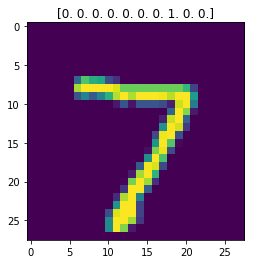

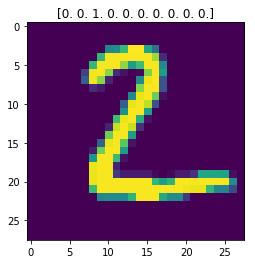

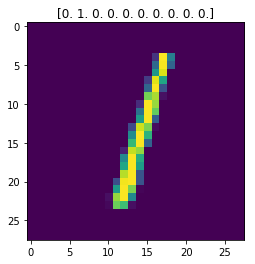

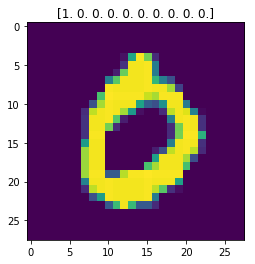

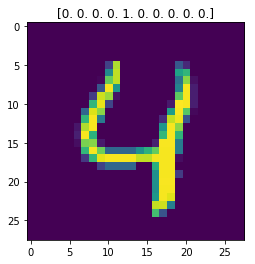

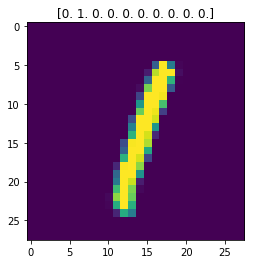

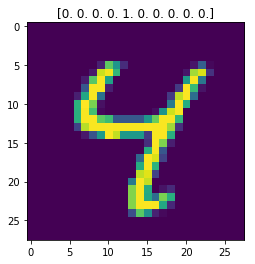

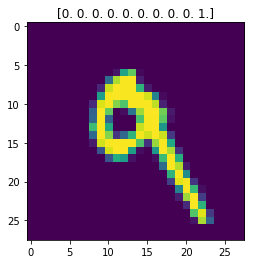

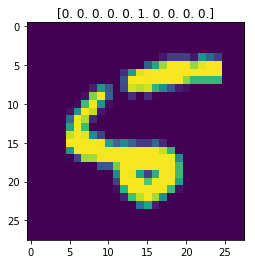

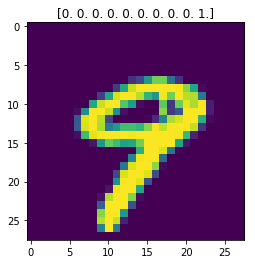

In [36]:
for i in range(10):
    plt.imshow(XTest[i].reshape((28,28)))
    plt.title(YTest[i])
    plt.show()

# So we get the correct results.! 